In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(["science","grid"])

In [2]:
# Calibration SN 

In [3]:
data = pd.read_feather("calibration_sn")
input_vars = pd.read_csv("input_parameters.csv")
os = pd.read_csv("output_names.csv")

In [5]:
def normalise(arr):
    arrmax = np.max(arr)
    arrmin = np.min(arr)
    
    arrnorm = (arr - arrmin) / (arrmax - arrmin)
    
    return arrnorm

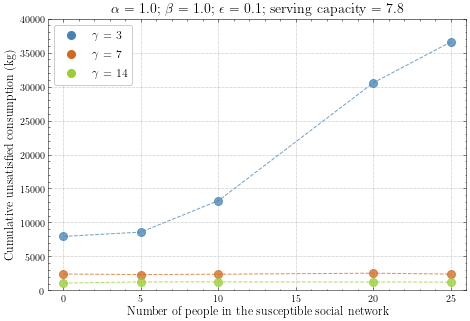

In [36]:
# dict to store relevant indices
fig, ax = plt.subplots(1,1,figsize=(7.5,5))
# x vector to plot            
x = np.linspace(0,4319,4320) 
colors = ['steelblue','chocolate','yellowgreen']


input_vars_filtered = input_vars[input_vars.epsilon==0.1]
cd = {}
labels = list()
gammas = [3,7,14]
for g in range(len(gammas)):
    cd[gammas[g]]=colors[g]
    labels.append(r"$\gamma$ = %s"%gammas[g])


        
datapointsx = {7:list(),3:list(),14:list()}
datapointsy = {7:list(),3:list(),14:list()}

# plot batch per color
for i in [0,5,10,15,20,25]:    

    for j in input_vars_filtered[input_vars_filtered.avg_interactions==i].index:
        
        try:
            datapointsx[input_vars_filtered.gamma[j]].append(i)
            datapointsy[input_vars_filtered.gamma[j]].append(data.o1[data.o0==j].iloc[-1])
        except:
            pass
#         plt.plot( i, data.o1[data.o0==j].iloc[-1],markersize=8,marker='o',color=cd[input_vars_filtered[input_vars_filtered.avg_interactions==i].gamma[j]], alpha=.75)


lines = [Line2D([0], [0], color=c, linewidth=10,marker='o' ,linestyle='None') for c in colors]
        
for i in datapointsx:
    plt.plot(datapointsx[i],datapointsy[i],marker='o',markersize=8,linestyle='--',color=cd[i],alpha=0.75)
        
        
# graph layout
# plt.title("")
plt.ylabel("Cumulative unsatisfied consumption (kg)",fontsize=12)
plt.xlabel("Number of people in the susceptible social network",fontsize=12)
plt.title(r"$\alpha$ = 1.0; $\beta$ = 1.0; $\epsilon$ = 0.1; serving capacity = 7.8",fontsize=14)
# plt.xlim([0,4320])

from matplotlib.lines import Line2D
lines = [Line2D([0], [0], color=c, markersize=8, marker='o',linestyle='None') for c in colors]
plt.legend(lines, labels,fontsize=12)
plt.ylim([0,40000])
plt.xlim([-1,26]);
plt.savefig("/home/daan/Desktop/sample_socialnetwork.png")